In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install numpy 

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib 

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install seaborn 

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install yfinance 


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     -------------------- ----------------- 524.3/949.2 kB 4.2 MB/s eta 0:00:01
     -------------------------------------- 949.2/949.2 kB 3.4 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   -------------------------- ------------- 1.0/1.6 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 4.5 MB/s eta 0:00:00
  Created whe

In [11]:
pip install statsmodels 

In [13]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [19]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# Define the stock ticker and the time period
ticker_symbol = 'NVDA'  # Example: Larsen & Toubro Limited (INE018A01030)
start_date = '2015-01-08'
end_date = '2025-01-08'

In [37]:
# Download the data
data = yf.download(ticker_symbol, start=start_date, end=end_date)

C:\Users\soura\AppData\Local\Temp\ipykernel_15844\2253740147.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker_symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


In [39]:
# Display the first few rows of the data
print(data.head())

Price          Close      High       Low      Open     Volume
Ticker          NVDA      NVDA      NVDA      NVDA       NVDA
Date                                                         
2015-01-08  0.476586  0.479466  0.464348  0.464588  283780000
2015-01-09  0.478506  0.482106  0.471787  0.478266  209540000
2015-01-12  0.472507  0.479946  0.468187  0.479706  190732000
2015-01-13  0.471787  0.485705  0.468427  0.476106  236720000
2015-01-14  0.473707  0.475146  0.465548  0.466747  155260000


In [41]:
# Handle missing values by filling them with the previous day's value
data.fillna(method='ffill', inplace=True)


C:\Users\soura\AppData\Local\Temp\ipykernel_15844\614577237.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [43]:
# Calculate the daily return percentage
data['Daily_Return'] = data['Close'].pct_change() * 100

In [45]:
# Calculate Moving Averages (SMA)
data['SMA_30'] = data['Close'].rolling(window=30).mean()
data['SMA_90'] = data['Close'].rolling(window=90).mean()

In [47]:
# Calculate Rolling Volatility (Standard Deviation of Daily Returns)
data['Rolling_Volatility_30'] = data['Daily_Return'].rolling(window=30).std()

In [49]:
# Drop any rows with NaN values created by the rolling windows
data.dropna(inplace=True)

In [51]:
print(data.head())

Price          Close      High       Low      Open     Volume Daily_Return  \
Ticker          NVDA      NVDA      NVDA      NVDA       NVDA                
Date                                                                         
2015-05-18  0.512388  0.515519  0.509497  0.511906  324972000    -0.140871   
2015-05-19  0.509193  0.514760  0.508225  0.513066  253808000    -0.623444   
2015-05-20  0.509193  0.515486  0.508709  0.509435  196824000     0.000000   
2015-05-21  0.505563  0.511613  0.505079  0.509435  239692000    -0.712971   
2015-05-22  0.504837  0.508709  0.503627  0.506773  212592000    -0.143587   

Price         SMA_30    SMA_90 Rolling_Volatility_30  
Ticker                                                
Date                                                  
2015-05-18  0.530005  0.519423              1.783936  
2015-05-19  0.529425  0.519786              1.778187  
2015-05-20  0.528716  0.520127              1.771441  
2015-05-21  0.527477  0.520494              1

<Figure size 1400x700 with 0 Axes>

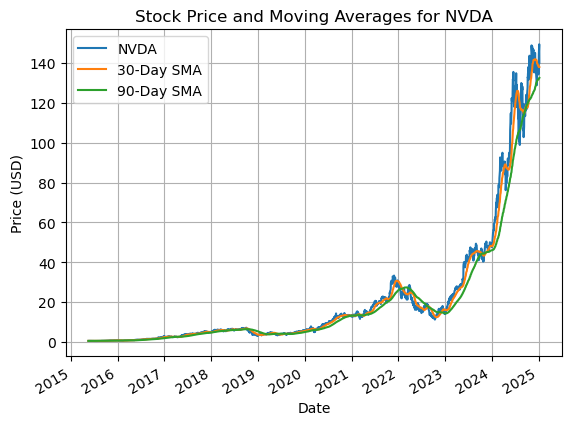

In [53]:
# Plot the raw closing price and moving averages
plt.figure(figsize=(14, 7))
data['Close'].plot(label='Close Price')
data['SMA_30'].plot(label='30-Day SMA')
data['SMA_90'].plot(label='90-Day SMA')
plt.title(f'Stock Price and Moving Averages for {ticker_symbol}')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

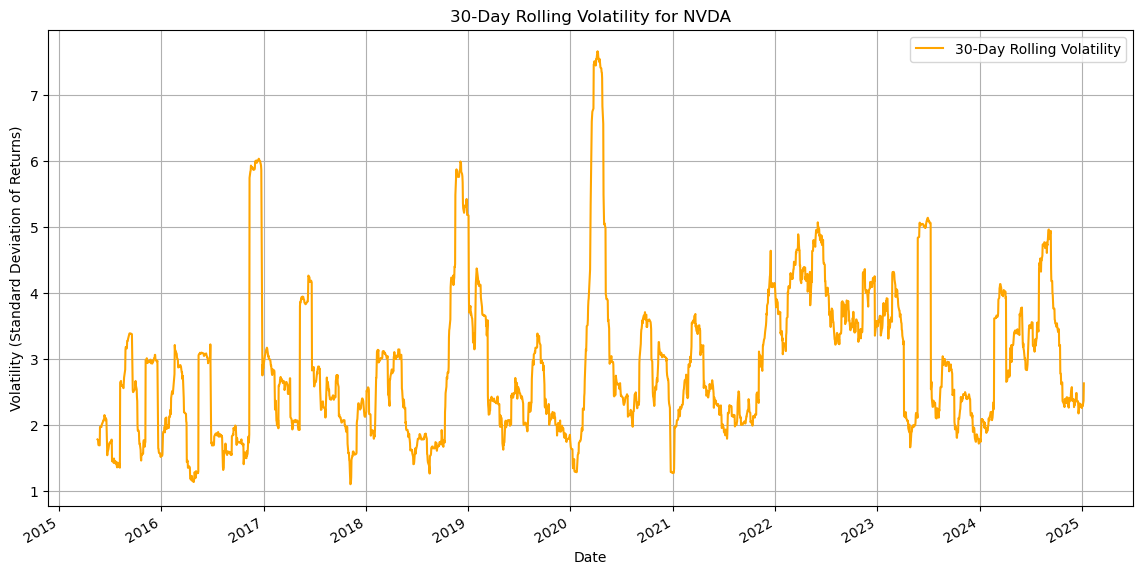

In [55]:
# Plot the rolling volatility
plt.figure(figsize=(14, 7))
data['Rolling_Volatility_30'].plot(label='30-Day Rolling Volatility', color='orange')
plt.title(f'30-Day Rolling Volatility for {ticker_symbol}')
plt.xlabel('Date')
plt.ylabel('Volatility (Standard Deviation of Returns)')
plt.legend()
plt.grid(True)
plt.show()

In [57]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [59]:
# Check for stationarity of the closing price
# The p-value should be less than 0.05 for the series to be stationary
result = adfuller(data['Close'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 2.885254
p-value: 1.000000


In [61]:
# Since the p-value is likely high, we'll use differencing
data['Close_Diff'] = data['Close'].diff().dropna()
result_diff = adfuller(data['Close_Diff'].dropna())
print('ADF Statistic (Differenced): %f' % result_diff[0])
print('p-value (Differenced): %f' % result_diff[1])

ADF Statistic (Differenced): -9.813706
p-value (Differenced): 0.000000


In [63]:
# Split the data
train_size = int(len(data) * 0.9)
train_data, test_data = data[:train_size], data[train_size:]

In [65]:
# Fit an ARIMA model
# We'll use a simple ARIMA(1,1,1) model for demonstration. You may need to tune p,d,q.
model_arima = ARIMA(train_data['Close'], order=(1, 1, 1))
arima_fit = model_arima.fit()

C:\Users\soura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\soura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\soura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [67]:
# Make predictions on the test set
arima_predictions = arima_fit.forecast(steps=len(test_data))

C:\Users\soura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\soura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


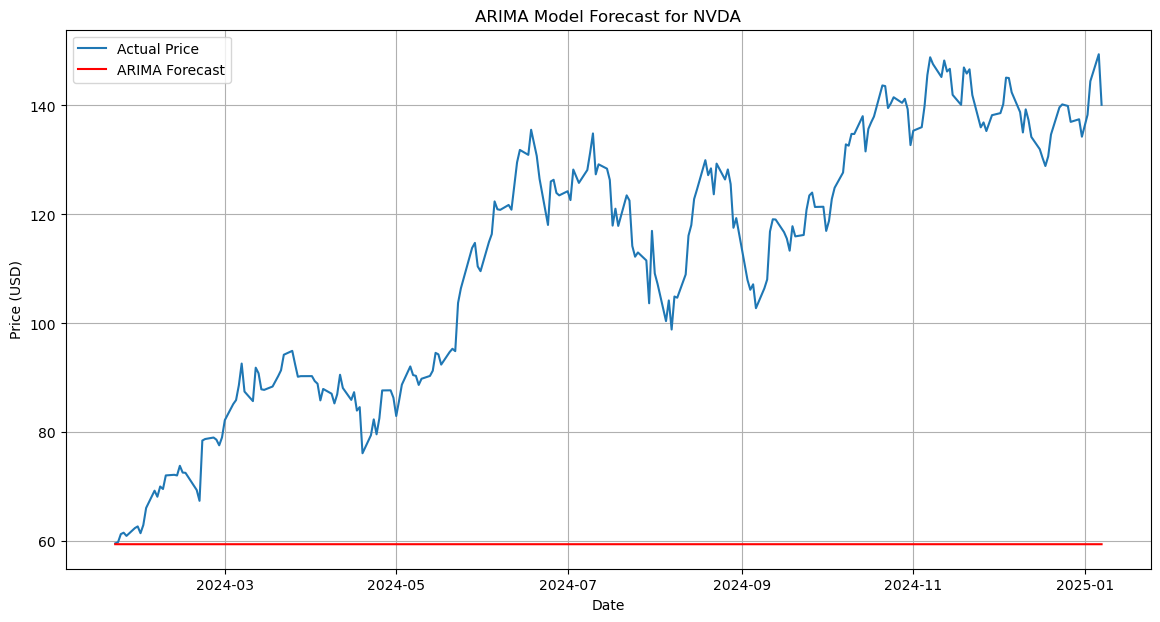

In [69]:
# Plot the ARIMA predictions
plt.figure(figsize=(14, 7))
plt.plot(test_data['Close'], label='Actual Price')
plt.plot(test_data.index, arima_predictions, label='ARIMA Forecast', color='red')
plt.title(f'ARIMA Model Forecast for {ticker_symbol}')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [71]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [73]:
# Scale the data for the LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

In [75]:
# Create sequences for the LSTM
# Use the last 60 days to predict the next day's price
prediction_days = 60
x_train, y_train = [], []
for x in range(prediction_days, len(scaled_data) - len(test_data)):
    x_train.append(scaled_data[x - prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [77]:
# Build the LSTM model
model_lstm = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(units=1)  # Prediction of the next closing price
])
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(x_train, y_train, epochs=10, batch_size=32)

C:\Users\soura\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 16s 87ms/step - loss: 0.0015
Epoch 2/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - loss: 2.8130e-04
Epoch 3/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 135ms/step - loss: 2.5110e-04
Epoch 4/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - loss: 2.7651e-04
Epoch 5/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 2.1157e-04
Epoch 6/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - loss: 2.2366e-04
Epoch 7/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - loss: 1.7682e-04
Epoch 8/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - loss: 2.0947e-04
Epoch 9/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - loss: 1.9312e-04
Epoch 10/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 8s 119ms/step - loss: 1.8668e-04


In [79]:
# Prepare test data for prediction
scaled_test_data = scaler.fit_transform(test_data['Close'].values.reshape(-1, 1))
x_test = []
for x in range(prediction_days, len(scaled_test_data)):
    x_test.append(scaled_test_data[x - prediction_days:x, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [81]:
# Make predictions with the LSTM model
lstm_predictions_scaled = model_lstm.predict(x_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 192ms/step


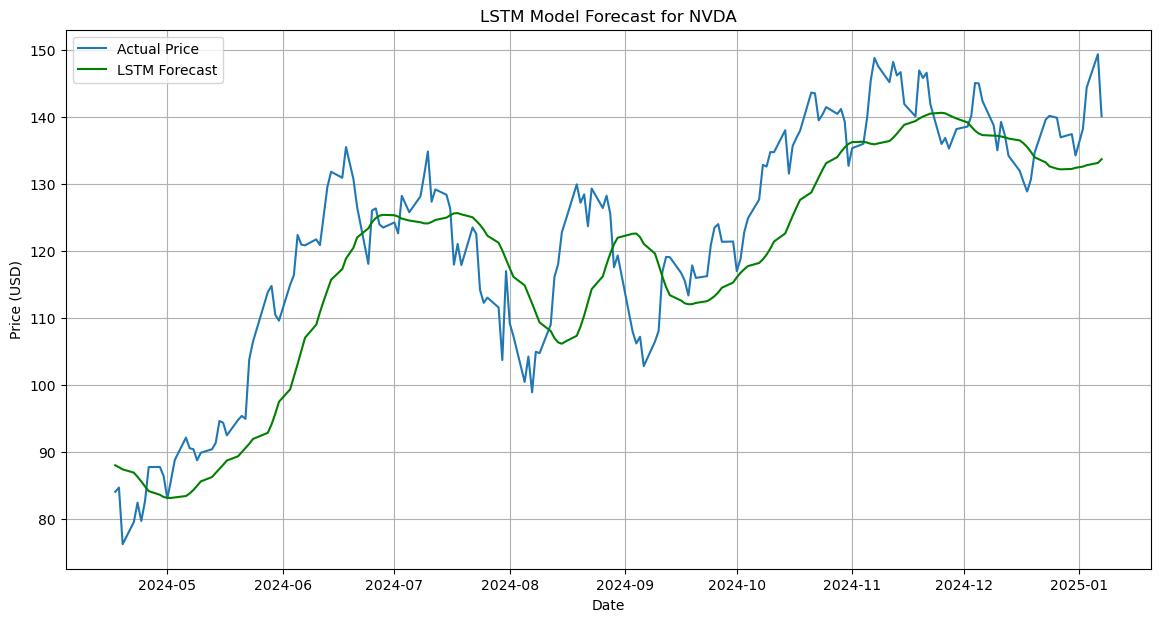

In [83]:
# Plot the LSTM predictions
plt.figure(figsize=(14, 7))
plt.plot(test_data.index[prediction_days:], test_data['Close'].values[prediction_days:], label='Actual Price')
plt.plot(test_data.index[prediction_days:], lstm_predictions, label='LSTM Forecast', color='green')
plt.title(f'LSTM Model Forecast for {ticker_symbol}')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [85]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [87]:
# Evaluate ARIMA model
rmse_arima = np.sqrt(mean_squared_error(test_data['Close'].iloc[:len(arima_predictions)], arima_predictions))
mae_arima = mean_absolute_error(test_data['Close'].iloc[:len(arima_predictions)], arima_predictions)
print(f"ARIMA Model - RMSE: {rmse_arima:.2f}, MAE: {mae_arima:.2f}")

ARIMA Model - RMSE: 57.31, MAE: 51.82


In [89]:
# Evaluate LSTM model
rmse_lstm = np.sqrt(mean_squared_error(test_data['Close'].iloc[prediction_days:], lstm_predictions))
mae_lstm = mean_absolute_error(test_data['Close'].iloc[prediction_days:], lstm_predictions)
print(f"LSTM Model - RMSE: {rmse_lstm:.2f}, MAE: {mae_lstm:.2f}")

LSTM Model - RMSE: 9.22, MAE: 7.65


In [ ]:
# Now, write your executive summary here
# Compare the two models based on their RMSE and MAE values
# Discuss the strengths and weaknesses of each model
# Provide a final recommendation
